In [1]:
import json
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
DataDir = "C:/Users/YH/Documents/Code/python/IC/IC_DSI_Project/Project_salary/data/data_cleaned_2021.csv"
df = pd.read_csv(DataDir)


In [3]:
def regex(row, symbol):
    ans = 1
    if re.search(symbol, row['Job Description']) is None:
        ans = 0
    return ans


In [4]:
df["writing"] = df.apply(
    regex, axis=1, args=("writ",))
df["analysing"] = df.apply(
    regex, axis=1, args=("analy",))
df["communicating"] = df.apply(
    regex, axis=1, args=("communicat",))
df["collaborating"] = df.apply(
    regex, axis=1, args=("(collaborat)|(teamwork)",))
df["innovating"] = df.apply(
    regex, axis=1, args=("(innovat)|(creat)",))
df["experience"] = df.apply(
    regex, axis=1, args=("experienc",))
df["troubleshooting"] = df.apply(
    regex, axis=1, args=("(troubleshoot)|(problem-solv)",))
df["presenting"] = df.apply(
    regex, axis=1, args=("present",))
df["managing"] = df.apply(
    regex, axis=1, args=("management",))
df["efficiency"] = df.apply(
    regex, axis=1, args=("effici",))
df["implementation ability"] = df.apply(
    regex, axis=1, args=("implem",))
df3 = df.iloc[:, [19, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]


<AxesSubplot:>

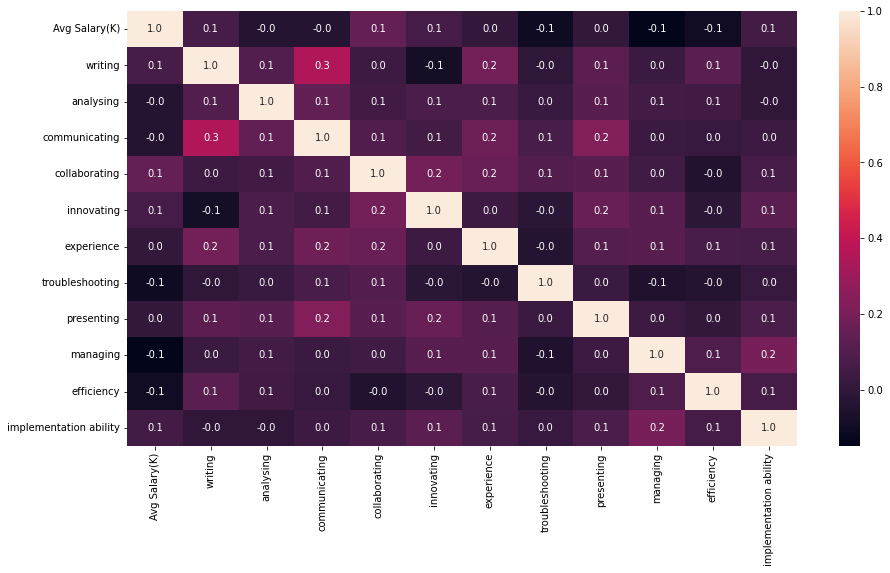

In [5]:
plt.figure(figsize = (15,8))
sns.heatmap(df3.corr(),annot=True, fmt="1.1f")

<AxesSubplot:xlabel='implementation ability'>

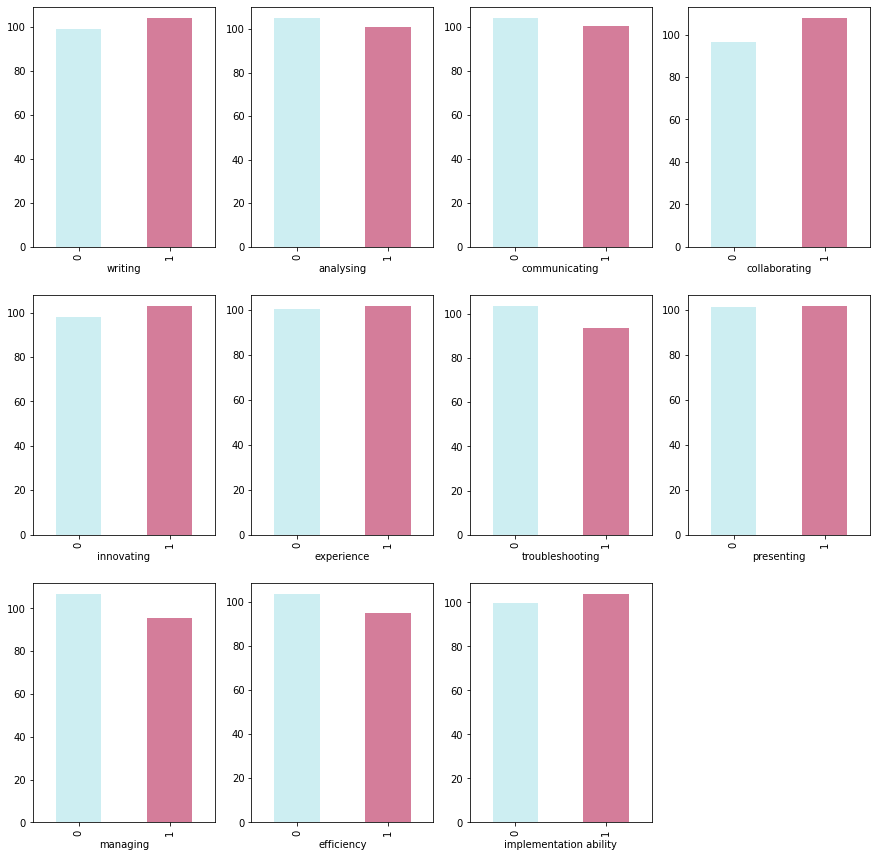

In [6]:
plt.figure(figsize=(15, 15))
colorlist = ['#a7e1e890', '#b41a4c90']
plt.subplot(3, 4, 1)
df.groupby('writing')['Avg Salary(K)'].mean().plot.bar(color=colorlist)

plt.subplot(3, 4, 2)
df.groupby('analysing')['Avg Salary(K)'].mean().plot.bar(color=colorlist)

plt.subplot(3, 4, 3)
df.groupby('communicating')['Avg Salary(K)'].mean().plot.bar(color=colorlist)

plt.subplot(3, 4, 4)
df.groupby('collaborating')['Avg Salary(K)'].mean().plot.bar(color=colorlist)

plt.subplot(3, 4, 5)
df.groupby('innovating')['Avg Salary(K)'].mean().plot.bar(color=colorlist)

plt.subplot(3, 4, 6)
df.groupby('experience')['Avg Salary(K)'].mean().plot.bar(color=colorlist)

plt.subplot(3, 4, 7)
df.groupby('troubleshooting')['Avg Salary(K)'].mean().plot.bar(color=colorlist)

plt.subplot(3, 4, 8)
df.groupby('presenting')['Avg Salary(K)'].mean().plot.bar(color=colorlist)

plt.subplot(3, 4, 9)
df.groupby('managing')['Avg Salary(K)'].mean().plot.bar(color=colorlist)

plt.subplot(3, 4, 10)
df.groupby('efficiency')['Avg Salary(K)'].mean().plot.bar(color=colorlist)

plt.subplot(3, 4, 11)
df.groupby('implementation ability')[
    'Avg Salary(K)'].mean().plot.bar(color=colorlist)


In [7]:
def rank(ex):
    if ex["Avg Salary(K)"] >= 100:
        return 1
    else:
        return 0


In [8]:
from pycaret.classification import *


In [9]:
df3['rank'] = df3.apply(rank, axis=1)
df3


,Avg Salary(K),writing,analysing,communicating,collaborating,innovating,experience,troubleshooting,presenting,managing,efficiency,implementation ability,rank
0,72.0,1,1,1,0,1,1,0,1,0,0,0,0
1,87.5,1,1,1,1,1,1,0,1,0,1,0,0
2,85.0,0,1,1,0,1,1,0,0,0,0,1,0
3,76.5,0,1,0,1,1,1,0,0,0,0,1,0
4,114.5,1,1,1,1,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,1,1,1,1,1,1,0,1,0,1,1,0
738,102.5,1,1,1,0,1,1,1,1,0,0,1,1
739,73.5,0,1,1,1,1,1,0,1,1,0,0,0
740,127.5,1,1,1,0,0,1,0,0,1,1,1,1


In [10]:
df4 = df3.drop(['Avg Salary(K)'], axis=1)


In [11]:
exp_clf = setup(df4, target='rank', silent=True, session_id=1)


,Description,Value
0,session_id,1
1,Target,rank
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(742, 12)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6570,0.7312,0.5917,0.6460,0.6139,0.3072,0.3106,0.1320
rf,Random Forest Classifier,0.6531,0.7143,0.6248,0.6346,0.6253,0.3031,0.3067,0.1410
lightgbm,Light Gradient Boosting Machine,0.6492,0.6631,0.6122,0.6314,0.6194,0.2948,0.2968,0.0110
dt,Decision Tree Classifier,0.6397,0.6999,0.5710,0.6287,0.5949,0.2721,0.2753,0.0050
gbc,Gradient Boosting Classifier,0.6320,0.6645,0.5667,0.6201,0.5893,0.2572,0.2601,0.0140
knn,K Neighbors Classifier,0.6319,0.6475,0.6160,0.6030,0.6072,0.2615,0.2635,0.3370
qda,Quadratic Discriminant Analysis,0.6224,0.6398,0.5582,0.6153,0.5794,0.2382,0.2436,0.0060
ada,Ada Boost Classifier,0.5858,0.6236,0.4917,0.5651,0.5243,0.1603,0.1623,0.0160
lr,Logistic Regression,0.5839,0.6256,0.4793,0.5640,0.5163,0.1552,0.1577,0.5250
ridge,Ridge Classifier,0.5819,0.0000,0.4833,0.5601,0.5172,0.1519,0.1538,0.0040


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [21]:
et = create_model('et')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6346,0.7054,0.5833,0.6087,0.5957,0.2627,0.2629
1,0.6538,0.7857,0.5417,0.6500,0.5909,0.2952,0.2989
2,0.6731,0.7865,0.5417,0.6842,0.6047,0.3323,0.3389
3,0.6923,0.6749,0.6250,0.6818,0.6522,0.3772,0.3784
4,0.7308,0.7634,0.7500,0.6923,0.7200,0.4615,0.4629
5,0.6731,0.7121,0.6667,0.6400,0.6531,0.3442,0.3445
6,0.6923,0.7879,0.5417,0.7222,0.6190,0.3697,0.3805
7,0.6154,0.7081,0.6000,0.6000,0.6000,0.2296,0.2296
8,0.5769,0.6756,0.4000,0.5882,0.4762,0.1424,0.1499
9,0.6275,0.7130,0.6667,0.5926,0.6275,0.2575,0.2593


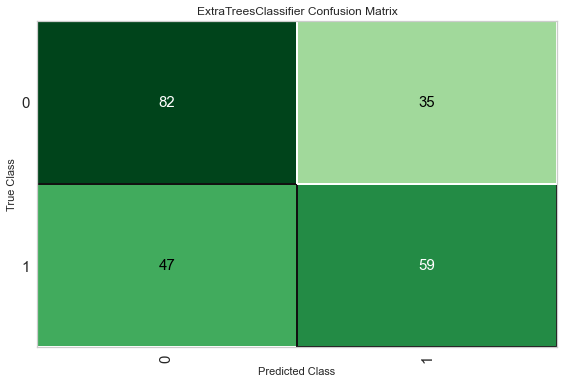

In [22]:
plot_model(et,'confusion_matrix')

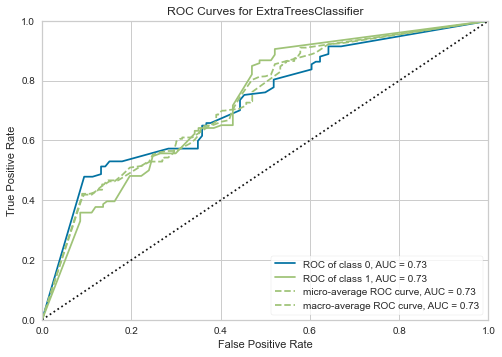

In [23]:
plot_model(et,'auc')

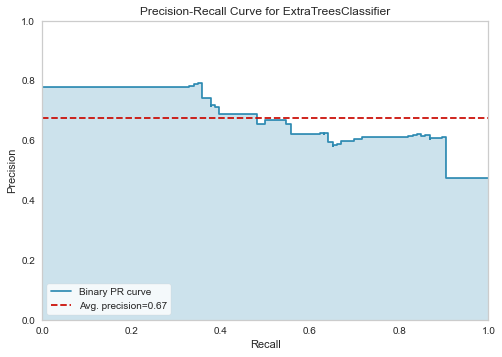

In [24]:
plot_model(et,'pr')

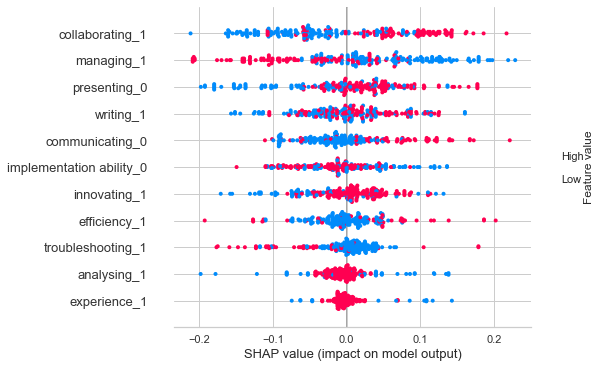

In [25]:
interpret_model(et)


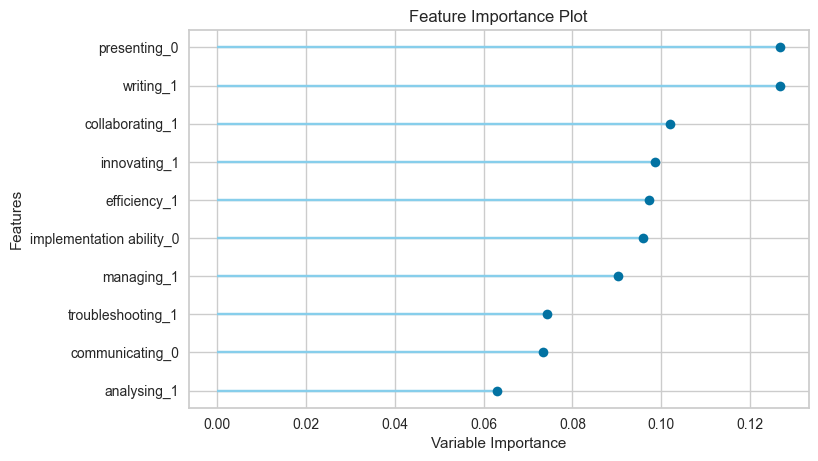

In [26]:
plot_model(et,'feature')

In [27]:
interpret_model(et,'reason')

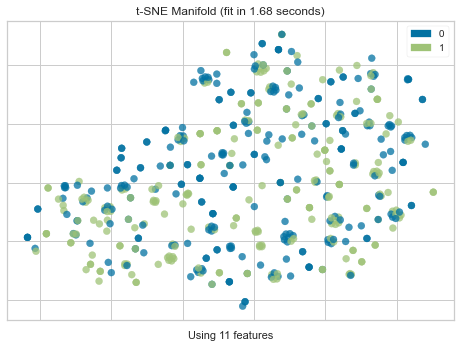

In [28]:
plot_model(et,'manifold')